In [3]:
# import dataset
import pandas as pd
df=pd.read_csv("synthetic_intern_feedback.csv",index_col="FeedbackID")
print(df.head())

            InternID        Date        Source   Department  \
FeedbackID                                                    
1               1048  2023-11-11  Social Media    Marketing   
2               1073  2024-02-05        Survey    Marketing   
3               1028  2024-10-16        Survey           HR   
4               1009  2023-09-01  Social Media  Engineering   
5               1085  2024-10-16  Social Media           HR   

                                                 FeedbackText TrueSentiment  
FeedbackID                                                                   
1                 Amazing internship, boosted my confidence..      Positive  
2                  Great experience! Learned so much. not bad      Positive  
3                  Projects were confusing and unclear. great      Negative  
4           Loved working on the projects, very engaging. ...      Positive  
5                  Great experience! Learned so much. not bad      Positive  


In [82]:
#Check basic info of data
df.info()
"""no null values are found.
All col names are standardized.
Date column needs to datetime. 
Convert all object col values to lower case.
"""


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   InternID       100 non-null    int64 
 1   Date           100 non-null    object
 2   Source         100 non-null    object
 3   Department     100 non-null    object
 4   FeedbackText   100 non-null    object
 5   TrueSentiment  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


'no null values are found.\nAll col names are standardized.\nDate column needs to datetime. \nConvert all object col values to lower case.\n'

In [4]:
#convert date column datatype
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'])

In [5]:
# remove spaces and standardize col volues
df.select_dtypes("object")
col=['Source','Department','FeedbackText','TrueSentiment']
for i in col:
    df[i]=df[i].str.strip()
    df[i]=df[i].str.lower()

In [85]:
#Check duplicates
df.duplicated().sum()
"no duplicate found"

'no duplicate found'

In [6]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon (only once)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mehar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
# create compund column
s=SentimentIntensityAnalyzer()
df['compound']=df['FeedbackText'].apply(lambda x:s.polarity_scores(x)['compound'])


In [11]:
# create score fun which creates a "feedback" column
def senti_score(score):
    if score >= 0.05:
        return "positive"
    elif  score <= -0.05 :
        return "negative"
    else:
        return "neutral"
        
df['Feedback']=df['compound'].apply(senti_score)

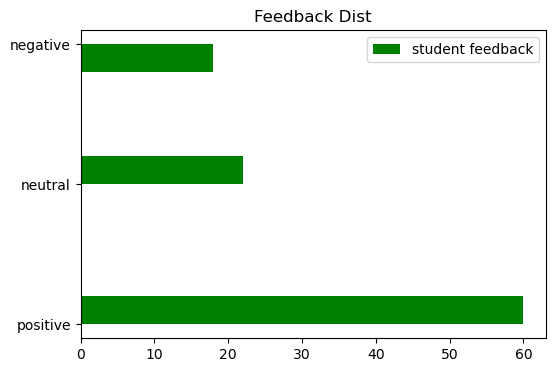

In [12]:
#bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['Feedback'],color="green",label="student feedback",orientation='horizontal')
plt.legend()
plt.title("Feedback Dist")
plt.show()

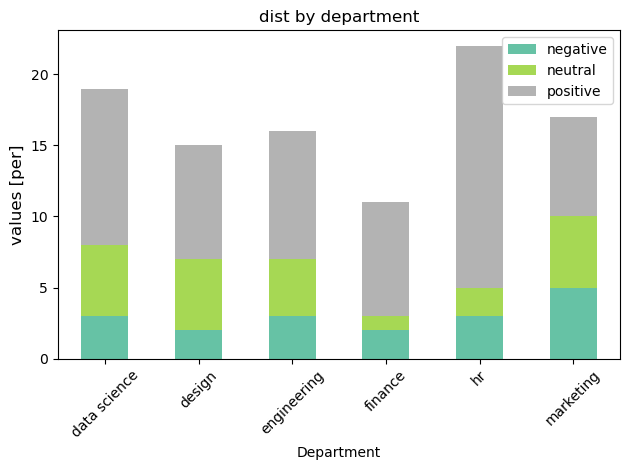

In [28]:
# dist feedback by dep wise
df.groupby("Department")['Feedback'].value_counts().unstack().plot(kind='bar',colormap="Set2",stacked=True);
plt.title("dist by department")
plt.ylabel("values [per]",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()
"""hr and data science have """